In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
seed_df=pd.read_csv('/content/sample_data/seeds.csv')
seed_df

,V1,V2,V3,V4,V5,V6,V7,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Checking for Null Values

In [ ]:
seed_df.isnull().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
Class    False
dtype: bool

In [ ]:
seed_df.columns=['Area','Perimeter','Compactness','LengthOfKernel','WidthOfKernel',
              'AsymmetryCoefficient','LengthOfKernelGroove','SeedType']

In [ ]:
seed_df.head()

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove,SeedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
seed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  210 non-null    float64
 1   Perimeter             210 non-null    float64
 2   Compactness           210 non-null    float64
 3   LengthOfKernel        210 non-null    float64
 4   WidthOfKernel         210 non-null    float64
 5   AsymmetryCoefficient  210 non-null    float64
 6   LengthOfKernelGroove  210 non-null    float64
 7   SeedType              210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [ ]:
scaler=MinMaxScaler()
norm_seeds=seed_df.copy()

In [ ]:
norm_seeds=seed_df.iloc[:,norm_seeds.columns!='SeedType']
inplace=True

In [ ]:
norm_seeds

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [ ]:
def minmaxscaler(x):
  for columnName, columnData in x.iteritems():
    x[columnName]=scaler.fit_transform(np.array(columnData).reshape(-1,1))

In [ ]:
minmaxscaler(norm_seeds)

<ipython-input-64-8e9ed8d7b27a>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for columnName, columnData in x.iteritems():
<ipython-input-64-8e9ed8d7b27a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[columnName]=scaler.fit_transform(np.array(columnData).reshape(-1,1))
<ipython-input-64-8e9ed8d7b27a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[columnName]=scaler.fit_transform(np.array(columnData).reshape(-1,1))
<ipython-input-64-8e9ed8d7

In [ ]:
norm_seeds

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493


Elbow plot to find k

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0.5, 1.0, 'Elbow Curve to find optimum K')

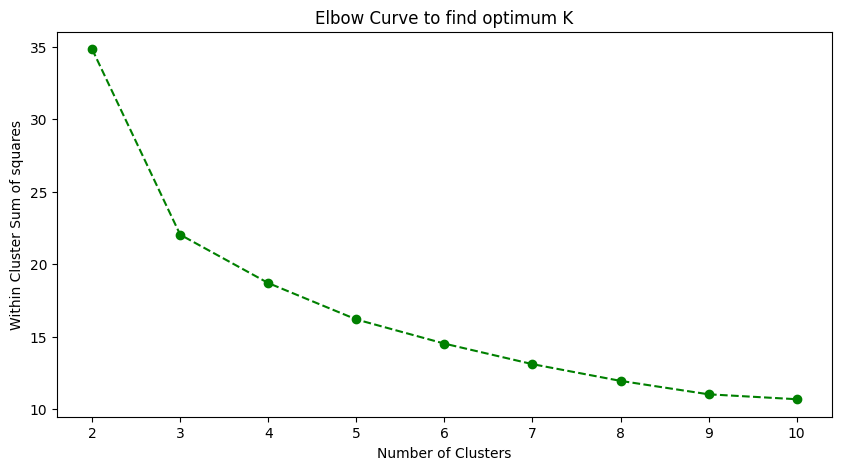

In [ ]:
k=list(range(2,11))
sum_of_squared_distances = []

for i in k:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(norm_seeds)
  sum_of_squared_distances.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(k, sum_of_squared_distances, 'go--')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of squares')
plt.title('Elbow Curve to find optimum K')

Now building kmeans model with k=3 

In [ ]:
#Instantiating
kmeans3=KMeans(n_clusters=3)

#Training the model
kmeans3.fit(norm_seeds)

#predicting
y_pred=kmeans3.fit_predict(norm_seeds)
print(y_pred)

#Storing the y_pred values in a new column
norm_seeds['Cluster']=y_pred+1 

[2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 2 2 1 2 2 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Storing the centroids to a dataframe 

In [ ]:
centroids=kmeans3.cluster_centers_
centroids=pd.DataFrame(centroids, columns=['Area','Perimeter','Compactness','LengthOfKernel','WidthOfKernel',
              'AsymmetryCoefficient','LengthOfKernelGroove'])
centroids.index=np.arange(1,len(centroids)+1) #Start the index from 1
centroids

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove
1,0.123334,0.175137,0.378179,0.186710,0.162527,0.498569,0.279288
2,0.757333,0.793744,0.694192,0.730038,0.769501,0.367576,0.757093
3,0.383490,0.419841,0.671204,0.364685,0.468499,0.264177,0.318384


In [ ]:
varieties = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
norm_seeds['Cluster'] = norm_seeds['Cluster'].replace(varieties)
norm_seeds

,Area,Perimeter,Compactness,LengthOfKernel,WidthOfKernel,AsymmetryCoefficient,LengthOfKernelGroove,Cluster
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,Canadian
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,Canadian
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,Canadian
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,Canadian
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,Canadian
...,...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821,Kama
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306,Kama
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402,Kama
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,Kama


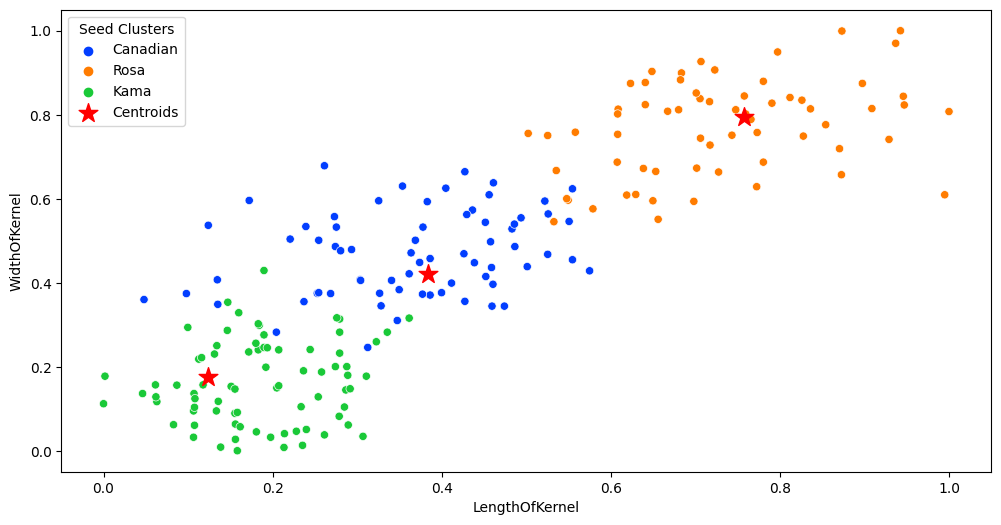

In [ ]:
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=norm_seeds['LengthOfKernel'], y=norm_seeds['WidthOfKernel'], hue=norm_seeds['Cluster'], palette='bright')
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:, 1],  
            s = 200, c = 'red', label = 'Centroids',marker = '*')   
plt.legend(title="Seed Clusters")  

In [ ]:
norm_seeds["Cluster"].value_counts()    

Kama        77
Canadian    69
Rosa        64
Name: Cluster, dtype: int64